In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load the dataset
df = pd.read_csv('generated_it_service_data.csv')
df.head()

,severity,req#,subject,logged_date,last_updated,service
0,medium,100002,Paper jam,10/27/2023 14:55:58 IST,10/29/2023 15:55:58 IST,Service 9
1,high,100006,Paper jam,08/12/2023 07:02:50 IST,08/14/2023 04:02:50 IST,Service 10
2,high,100007,Cannot connect to printer,08/12/2023 14:08:28 IST,08/14/2023 23:08:28 IST,Service 4
3,high,100010,Low ink warning,10/17/2023 21:51:06 IST,10/18/2023 13:51:06 IST,Service 2
4,medium,100012,Cannot connect to printer,03/21/2023 11:02:31 IST,03/23/2023 00:02:31 IST,Service 7


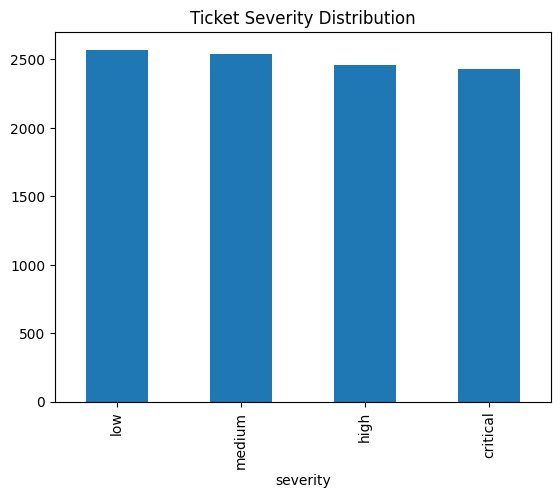

In [10]:
# Severity distribution
severity_counts = df['severity'].value_counts()
severity_counts.plot(kind='bar', title='Ticket Severity Distribution')
plt.show()

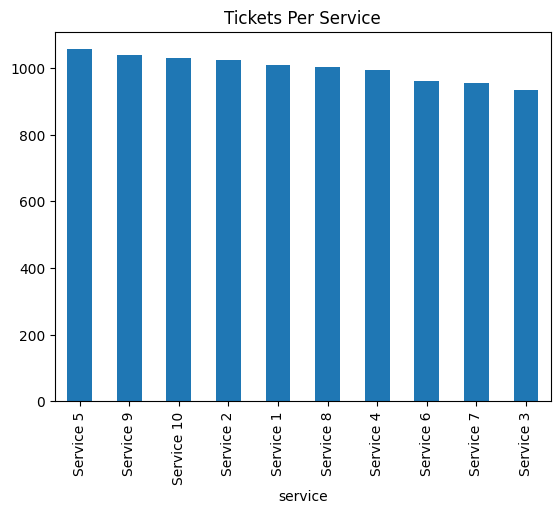

In [11]:
# Service usage
service_counts = df['service'].value_counts()
service_counts.plot(kind='bar', title='Tickets Per Service')
plt.show()

In [16]:
# Tickets over logged time
df['logged_date'] = pd.to_datetime(df['logged_date'])
df.head(2)

,severity,req#,subject,logged_date,last_updated,service
0,medium,100002,Paper jam,2023-10-27 14:55:58+05:30,10/29/2023 15:55:58 IST,Service 9
1,high,100006,Paper jam,2023-08-12 07:02:50+05:30,08/14/2023 04:02:50 IST,Service 10


In [19]:
df['month'] = df['logged_date'].dt.to_period('M')  # Group by month
df.head(2)

/tmp/ipykernel_36825/3600389552.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['logged_date'].dt.to_period('M')  # Group by month


,severity,req#,subject,logged_date,last_updated,service,month
0,medium,100002,Paper jam,2023-10-27 14:55:58+05:30,10/29/2023 15:55:58 IST,Service 9,2023-10
1,high,100006,Paper jam,2023-08-12 07:02:50+05:30,08/14/2023 04:02:50 IST,Service 10,2023-08


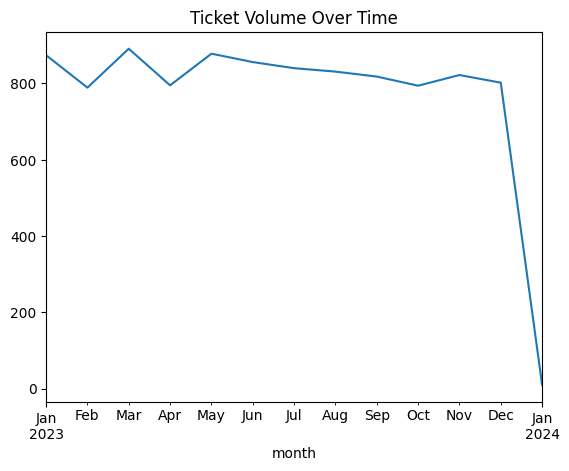

In [20]:
ticket_trends = df.groupby('month').size()
ticket_trends.plot(kind='line', title='Ticket Volume Over Time')
plt.show()

In [21]:
# Resolution time calculation
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['resolution_time'] = (df['last_updated'] - df['logged_date']).dt.total_seconds() / 3600 # Convert to hours

/tmp/ipykernel_36825/4105995014.py:2: FutureWarning: Parsing 'IST' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df['last_updated'] = pd.to_datetime(df['last_updated'])
/tmp/ipykernel_36825/4105995014.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_updated'] = pd.to_datetime(df['last_updated'])


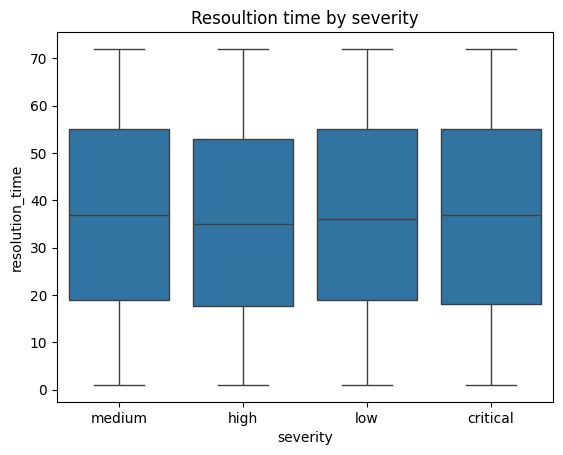

In [23]:
# Resolution time by severity
sns.boxplot(x='severity', y='resolution_time', data=df)
plt.title('Resoultion time by severity')
plt.show()

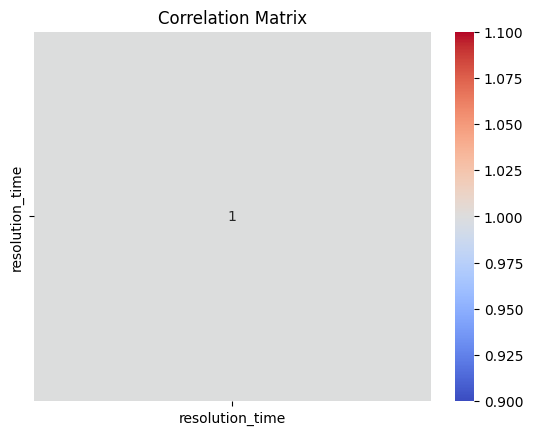

In [24]:
# Correlation heatmap
correlation_matrix = df[['resolution_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()